<a href="https://colab.research.google.com/github/Charmie13/MSCI-641-Text-Analytics_Final-Project/blob/main/Combined_Data_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import csv
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import train_test_split

In [2]:
train_bodies = pd.read_csv('train_bodies.csv')
train_bodies.head(10)

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...
5,8,There is so much fake stuff on the Internet in...
6,9,"(CNN) -- A meteorite crashed down in Managua, ..."
7,10,"Move over, Netflix and Hulu.\nWord has it that..."
8,11,We’ve all seen the traditional depictions of G...
9,13,A SOLDIER has been shot at Canada’s National W...


In [3]:
test_bodies = pd.read_csv('competition_test_bodies.csv')
test_bodies.head(10)

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...
5,20,“I once sent Tim an email about the quality of...
6,21,Absolutely no one was devastated when news bro...
7,28,In designing its first wearable device in the ...
8,31,"The picture of a possible ""Crabzilla"" measurin..."
9,33,"Early Tuesday morning, Dornella Conner was “ri..."


In [4]:
# load training data
train_df = pd.read_csv('train_stances.csv')
# load testing data
test_df = pd.read_csv('competition_test_stances.csv')

In [5]:
train_df.replace('unrelated',0,True)
train_df.replace('agree',1,True)
train_df.replace('disagree',2,True)
train_df.replace('discuss',3,True)

test_df.replace('unrelated',0,True)
test_df.replace('agree',1,True)
test_df.replace('disagree',2,True)
test_df.replace('discuss',3,True)


In [6]:
def labels(row):
  if row['Stance'] == 0:
    return 1
  else:
    return 0

train_df['Modified Labels'] = train_df.apply(labels, axis=1)

In [7]:
train_df

,Headline,Body ID,Stance,Modified Labels
0,Police find mass graves with at least '15 bodi...,712,0,1
1,Hundreds of Palestinians flee floods in Gaza a...,158,1,0
2,"Christian Bale passes on role of Steve Jobs, a...",137,0,1
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,0,1
4,Spider burrowed through tourist's stomach and ...,1923,2,0
...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,0,1
49968,Brian Williams slams social media for speculat...,2419,0,1
49969,Mexico Says Missing Students Not Found In Firs...,1156,1,0
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,3,0


In [8]:
combined_df_train = train_df.join(train_bodies.set_index('Body ID'), on='Body ID')
combined_df_test = test_df.join(test_bodies.set_index('Body ID'), on='Body ID')

In [9]:
combined_df_train['Modified Labels'].value_counts()

1    36545
0    13427
Name: Modified Labels, dtype: int64

In [10]:
combined_df_train

,Headline,Body ID,Stance,Modified Labels,articleBody
0,Police find mass graves with at least '15 bodi...,712,0,1,Danny Boyle is directing the untitled film\n\n...
1,Hundreds of Palestinians flee floods in Gaza a...,158,1,0,Hundreds of Palestinians were evacuated from t...
2,"Christian Bale passes on role of Steve Jobs, a...",137,0,1,30-year-old Moscow resident was hospitalized w...
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,0,1,(Reuters) - A Canadian soldier was shot at the...
4,Spider burrowed through tourist's stomach and ...,1923,2,0,"Fear not arachnophobes, the story of Bunbury's..."
...,...,...,...,...,...
49967,Urgent: The Leader of ISIL 'Abu Bakr al-Baghda...,1681,0,1,(CNN) -- Boko Haram laughed off Nigeria's anno...
49968,Brian Williams slams social media for speculat...,2419,0,1,Along with unveiling the Apple Watch earlier t...
49969,Mexico Says Missing Students Not Found In Firs...,1156,1,0,The bodies found in a mass grave were confirme...
49970,US Lawmaker: Ten ISIS Fighters Have Been Appre...,1012,3,0,Rep. Duncan Hunter (R-CA) told Greta Van Suste...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [12]:
target1 = ['Stance']
features1 = ['Headline', 'Body ID', 'Modified Labels', 'articleBody']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats

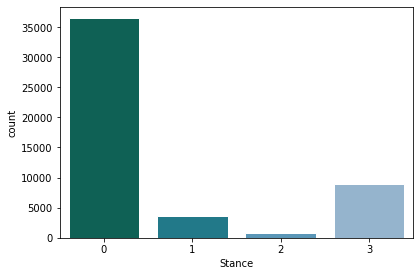

In [14]:
x1 = combined_df_train[features1]
y1 = combined_df_train[target1]

fig, (ax1) = plt.subplots(1,1)
sns.set_theme(style="darkgrid")
palette = sns.color_palette("PuBuGn_r")
sns.countplot(x = "Stance", data = combined_df_train, ax=ax1, palette=palette)
fig.tight_layout()
fig.show()

In [15]:
features = ['Headline', 'Body ID', 'Stance', 'articleBody']
target = ['Modified Labels']

In [16]:
x = combined_df_train[features]
y = combined_df_train[target]

In [17]:
from collections import Counter

In [18]:
y_label = y["Modified Labels"]
under_sampler = RandomUnderSampler(random_state=42)
print('Before sampling label dataset shape {}'.format(Counter(y_label)))
X_label, y_label = under_sampler.fit_resample(x, y_label)
print('Resampled dataset shape {}'.format(Counter(y_label)))

Before sampling label dataset shape Counter({1: 36545, 0: 13427})
Resampled dataset shape Counter({0: 13427, 1: 13427})


In [19]:
train_reduced = pd.concat([X_label, y_label], axis = 1)

In [20]:
train_reduced

,Headline,Body ID,Stance,articleBody,Modified Labels
0,Hundreds of Palestinians flee floods in Gaza a...,158,1,Hundreds of Palestinians were evacuated from t...,0
1,Spider burrowed through tourist's stomach and ...,1923,2,"Fear not arachnophobes, the story of Bunbury's...",0
2,'Nasa Confirms Earth Will Experience 6 Days of...,154,1,Thousands of people have been duped by a fake ...,0
3,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,1,If you’ve seen a story floating around on your...,0
4,Gateway Pundit,2327,3,A British rapper whose father is awaiting tria...,0
...,...,...,...,...,...
26849,"Sadly, Pumpkin Spice Condoms Aren't A Thing Af...",2118,0,"On the same day Michael Brown was buried, a Fe...",1
26850,Kim Jong-un 'set to open a new restaurant in S...,1339,0,Tiger Woods' agent responded Monday to inflamm...,1
26851,Taliban member swapped by Obama for Bowe Bergd...,1637,0,"Big Bank Hank, a member of the early hip-hop g...",1
26852,Macklemore Gets Twitter-Trolled with the #Mack...,322,0,"LOS ANGELES, California ( The Adobo Chronicles...",1


In [21]:
train_reduced.shape

(26854, 5)

In [22]:
y_label1 = y["Modified Labels"]
over_sampler = RandomOverSampler(random_state=42)
print('Before sampling label dataset shape {}'.format(Counter(y_label1)))
X_label, y_label1 = over_sampler.fit_resample(x, y_label1)
print('Resampled dataset shape {}'.format(Counter(y_label1)))

Before sampling label dataset shape Counter({1: 36545, 0: 13427})
Resampled dataset shape Counter({1: 36545, 0: 36545})


In [23]:
train_oversample = pd.concat([X_label, y_label1], axis = 1)

In [24]:
train_oversample

,Headline,Body ID,Stance,articleBody,Modified Labels
0,Police find mass graves with at least '15 bodi...,712,0,Danny Boyle is directing the untitled film\n\n...,1
1,Hundreds of Palestinians flee floods in Gaza a...,158,1,Hundreds of Palestinians were evacuated from t...,0
2,"Christian Bale passes on role of Steve Jobs, a...",137,0,30-year-old Moscow resident was hospitalized w...,1
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,0,(Reuters) - A Canadian soldier was shot at the...,1
4,Spider burrowed through tourist's stomach and ...,1923,2,"Fear not arachnophobes, the story of Bunbury's...",0
...,...,...,...,...,...
73085,Macaulay Culkin Dead: Actor Once Again Victim ...,1545,1,Macaulay Culkin has once again died — at least...,0
73086,"Big Bank Hank, US rapper and Sugarhill Gang fo...",1637,1,"Big Bank Hank, a member of the early hip-hop g...",0
73087,Fears journalist James Wright Foley beheaded b...,1948,3,Militants from Islamic State (Isis) claimed to...,0
73088,ISIS militants appear to behead abducted Ameri...,2047,3,"According to multiple reports, ISIS claims to ...",0


In [25]:
train_oversample.shape

(73090, 5)

In [26]:
combined_df_test.shape

(25413, 4)

In [27]:
combined_df_test

,Headline,Body ID,Stance,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,2008,0,A RESPECTED senior French police officer inves...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,0,Dave Morin's social networking company Path is...
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,0,A bereaved Afghan mother took revenge on the T...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,0,Hewlett-Packard is officially splitting in two...
4,Argentina's President Adopts Boy to End Werewo...,37,0,An airline passenger headed to Dallas was remo...
...,...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,1,"Congressional Republicans, evidently hoping th..."
25409,The success of the Affordable Care Act is a hu...,2583,3,Did Obamacare work?\n\nIt’s worth reflecting u...
25410,The success of the Affordable Care Act is a hu...,2584,2,Millions may lose coverage next year if Congre...
25411,The success of the Affordable Care Act is a hu...,2585,2,"Come November, the grim trudge across the incr..."


In [28]:
stances = train_reduced['Stance']
stances.replace(0, 'unrelated',True)
stances.replace(1, 'agree',True)
stances.replace(2, 'disagree',True)
stances.replace(3, 'discuss',True)

In [29]:
stances

0            agree
1         disagree
2            agree
3            agree
4          discuss
           ...    
26849    unrelated
26850    unrelated
26851    unrelated
26852    unrelated
26853    unrelated
Name: Stance, Length: 26854, dtype: object

In [30]:
train_reduced

,Headline,Body ID,Stance,articleBody,Modified Labels
0,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...,0
1,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's...",0
2,'Nasa Confirms Earth Will Experience 6 Days of...,154,agree,Thousands of people have been duped by a fake ...,0
3,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,agree,If you’ve seen a story floating around on your...,0
4,Gateway Pundit,2327,discuss,A British rapper whose father is awaiting tria...,0
...,...,...,...,...,...
26849,"Sadly, Pumpkin Spice Condoms Aren't A Thing Af...",2118,unrelated,"On the same day Michael Brown was buried, a Fe...",1
26850,Kim Jong-un 'set to open a new restaurant in S...,1339,unrelated,Tiger Woods' agent responded Monday to inflamm...,1
26851,Taliban member swapped by Obama for Bowe Bergd...,1637,unrelated,"Big Bank Hank, a member of the early hip-hop g...",1
26852,Macklemore Gets Twitter-Trolled with the #Mack...,322,unrelated,"LOS ANGELES, California ( The Adobo Chronicles...",1


In [31]:
train_reduced.shape

(26854, 5)

In [32]:
stances2 = train_oversample['Stance']
stances2.replace(0, 'unrelated',True)
stances2.replace(1, 'agree',True)
stances2.replace(2, 'disagree',True)
stances2.replace(3, 'discuss',True)

In [33]:
stances2

0        unrelated
1            agree
2        unrelated
3        unrelated
4         disagree
           ...    
73085        agree
73086        agree
73087      discuss
73088      discuss
73089      discuss
Name: Stance, Length: 73090, dtype: object

In [34]:
train_oversample

,Headline,Body ID,Stance,articleBody,Modified Labels
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\n\n...,1
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...,0
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated,30-year-old Moscow resident was hospitalized w...,1
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated,(Reuters) - A Canadian soldier was shot at the...,1
4,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's...",0
...,...,...,...,...,...
73085,Macaulay Culkin Dead: Actor Once Again Victim ...,1545,agree,Macaulay Culkin has once again died — at least...,0
73086,"Big Bank Hank, US rapper and Sugarhill Gang fo...",1637,agree,"Big Bank Hank, a member of the early hip-hop g...",0
73087,Fears journalist James Wright Foley beheaded b...,1948,discuss,Militants from Islamic State (Isis) claimed to...,0
73088,ISIS militants appear to behead abducted Ameri...,2047,discuss,"According to multiple reports, ISIS claims to ...",0


In [35]:
train_oversample.shape

(73090, 5)

In [36]:
stances1 = combined_df_test['Stance']
stances1.replace(0, 'agree',True)
stances1.replace(1, 'disagree',True)
stances1.replace(2, 'discuss',True)
stances1.replace(3, 'unrelated',True)
combined_df_test['Stance'] = stances1

In [37]:
combined_df_test

,Headline,Body ID,Stance,articleBody
0,Ferguson riots: Pregnant woman loses eye after...,2008,agree,A RESPECTED senior French police officer inves...
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,agree,Dave Morin's social networking company Path is...
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,agree,A bereaved Afghan mother took revenge on the T...
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,agree,Hewlett-Packard is officially splitting in two...
4,Argentina's President Adopts Boy to End Werewo...,37,agree,An airline passenger headed to Dallas was remo...
...,...,...,...,...
25408,The success of the Affordable Care Act is a hu...,2582,disagree,"Congressional Republicans, evidently hoping th..."
25409,The success of the Affordable Care Act is a hu...,2583,unrelated,Did Obamacare work?\n\nIt’s worth reflecting u...
25410,The success of the Affordable Care Act is a hu...,2584,discuss,Millions may lose coverage next year if Congre...
25411,The success of the Affordable Care Act is a hu...,2585,discuss,"Come November, the grim trudge across the incr..."


In [38]:
train_reduced = train_reduced.drop(columns=['Modified Labels'])

In [39]:
train_reduced

,Headline,Body ID,Stance,articleBody
0,Hundreds of Palestinians flee floods in Gaza a...,158,agree,Hundreds of Palestinians were evacuated from t...
1,Spider burrowed through tourist's stomach and ...,1923,disagree,"Fear not arachnophobes, the story of Bunbury's..."
2,'Nasa Confirms Earth Will Experience 6 Days of...,154,agree,Thousands of people have been duped by a fake ...
3,Banksy 'Arrested & Real Identity Revealed' Is ...,1739,agree,If you’ve seen a story floating around on your...
4,Gateway Pundit,2327,discuss,A British rapper whose father is awaiting tria...
...,...,...,...,...
26849,"Sadly, Pumpkin Spice Condoms Aren't A Thing Af...",2118,unrelated,"On the same day Michael Brown was buried, a Fe..."
26850,Kim Jong-un 'set to open a new restaurant in S...,1339,unrelated,Tiger Woods' agent responded Monday to inflamm...
26851,Taliban member swapped by Obama for Bowe Bergd...,1637,unrelated,"Big Bank Hank, a member of the early hip-hop g..."
26852,Macklemore Gets Twitter-Trolled with the #Mack...,322,unrelated,"LOS ANGELES, California ( The Adobo Chronicles..."


In [40]:
train_oversample = train_oversample.drop(columns=['Modified Labels'])

In [41]:
train_oversample.to_csv('train_oversample.csv', index=False, encoding='utf-8')

In [ ]:
from google.colab import files
files.download('train_oversample.csv') 

In [43]:
train_reduced.to_csv('train_reduced.csv', index=False, encoding='utf-8')

In [ ]:
files.download('train_reduced.csv') 

In [45]:
combined_df_test.to_csv('test.csv', index=False, encoding='utf-8')

In [ ]:
files.download('test.csv') 